# [CAPSTONE] Fruits Freshness Classifier based on Comprehensive Image Features

# Executive Summary

Problem Statement:

- It is difficult to identify the freshness of the fruits one by one when the number of fruits is in large volumes
- It is important to monitor the freshness of the fruits from time to time to ensure good customer satisfaction and retention

Scope:

- The dataset covers fruits specifically on apples, bananas, and oranges

Definitions:

- Total RGB Color Composition: The cumulative measurement of color distribution across the red, green, and blue channels within each image.
   - Red: Total Colour on the Red Channel
   - Green: Total colour on the Green Channel
   - Blue: Total colour on the Blue Channel
- Picture Intensity (Contrast): A component of texture analysis, indicating the degree of brightness or darkness in the image.
- Overall Energy: A measure of the aggregate visual intensity and vibrancy present in the image.
- Pixel Correlation: An assessment of the interdependence and relationship between adjacent pixels in the image.
- Homogeneity: An evaluation of the uniformity and consistency of visual elements throughout the image.

Methodology:

- Use Accuracy, Precision, Recall (Sensitivity), F1, MCC and Kappa to evaluate the classification performance of the models
- Use RMSE, MSE, MAE to evaluate the regression performance of the models

# Importing the Libraries

In [393]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# Scaler Methods
from sklearn.preprocessing import RobustScaler, MaxAbsScaler, MinMaxScaler, StandardScaler

# Machine Learning Models

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import (
    make_scorer,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    matthews_corrcoef, 
    cohen_kappa_score,
    mean_squared_error,
    mean_absolute_error,
    confusion_matrix, 
    ConfusionMatrixDisplay,
    classification_report
)

import pickle


# Importing the Database

In [394]:
df = pd.read_csv("fruits.csv")


In [395]:
df


,Image,Red,Green,Blue,Contrast,Energy,Correlation,Homogeneity,Freshness
0,rotated_by_75_Screen Shot 2018-06-08 at 5.25.0...,480016,320784,308173,1455.458367,0.091725,0.826346,0.216102,1
1,rotated_by_15_Screen Shot 2018-06-08 at 5.15.2...,429908,287132,294462,1898.266122,0.089732,0.849394,0.243132,1
2,rotated_by_15_Screen Shot 2018-06-08 at 5.26.4...,493084,503330,363093,1304.415102,0.298530,0.871957,0.475525,1
3,rotated_by_15_Screen Shot 2018-06-08 at 5.27.0...,398133,463717,277134,1057.761224,0.087325,0.859704,0.302005,1
4,rotated_by_75_Screen Shot 2018-06-08 at 5.33.4...,403308,424642,264396,2111.405306,0.109698,0.800220,0.234803,1
...,...,...,...,...,...,...,...,...,...
10896,saltandpepper_Screen Shot 2018-06-12 at 11.46....,510687,494520,443423,252.043265,0.143389,0.848958,0.359614,0
10897,rotated_by_75_Screen Shot 2018-06-12 at 11.40....,337028,264447,225432,882.749388,0.131601,0.892012,0.216836,0
10898,Screen Shot 2018-06-12 at 11.46.17 PM,514385,463767,426552,441.551020,0.113603,0.919746,0.324600,0
10899,rotated_by_15_Screen Shot 2018-06-12 at 11.45....,452977,368142,305902,1738.992653,0.224891,0.850204,0.377876,0


# Exploratory Data Analysis (EDA)

In [396]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10901 entries, 0 to 10900
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image        10901 non-null  object 
 1   Red          10901 non-null  int64  
 2   Green        10901 non-null  int64  
 3   Blue         10901 non-null  int64  
 4   Contrast     10901 non-null  float64
 5   Energy       10901 non-null  float64
 6   Correlation  10901 non-null  float64
 7   Homogeneity  10901 non-null  float64
 8   Freshness    10901 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 766.6+ KB


In [397]:
df.describe()


,Red,Green,Blue,Contrast,Energy,Correlation,Homogeneity,Freshness
count,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000
mean,466876.253646,402949.903036,337048.713788,1337.803641,0.258193,0.887706,0.427981,0.434822
std,83431.591490,85979.015033,84021.923106,777.397036,0.140672,0.043782,0.138434,0.495756
min,74212.000000,54894.000000,38685.000000,31.596735,0.016229,0.406196,0.041493,0.000000
25%,418183.000000,345000.000000,279333.000000,647.005714,0.159700,0.864890,0.338576,0.000000
50%,472741.000000,400620.000000,333381.000000,1387.058776,0.233098,0.888041,0.410762,0.000000
75%,522343.000000,460991.000000,392566.000000,1789.657143,0.331826,0.915210,0.502112,1.000000
max,633913.000000,622438.000000,571283.000000,5078.617143,0.788228,0.993536,0.878452,1.000000


In [398]:
df.isnull().sum()


Image          0
Red            0
Green          0
Blue           0
Contrast       0
Energy         0
Correlation    0
Homogeneity    0
Freshness      0
dtype: int64

In [399]:
df.dtypes


Image           object
Red              int64
Green            int64
Blue             int64
Contrast       float64
Energy         float64
Correlation    float64
Homogeneity    float64
Freshness        int64
dtype: object

In [400]:
df = df.drop(columns=['Image'])


In [401]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


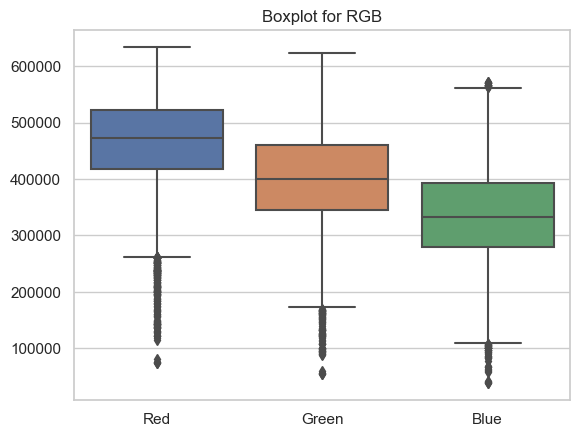

In [402]:
columns = ['Red', 'Green', 'Blue']
df_rgb = df[columns]

sns.boxplot(data=df_rgb)
plt.title("Boxplot for RGB")
plt.show()


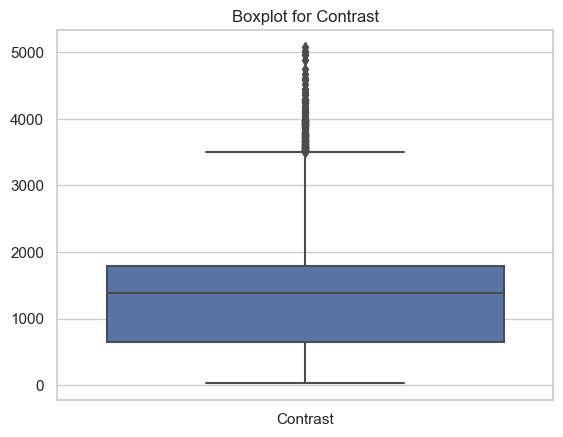

In [403]:
columns = ['Contrast']
df_contrast = df[columns]

sns.boxplot(data=df_contrast)
plt.title("Boxplot for Contrast")
plt.show()


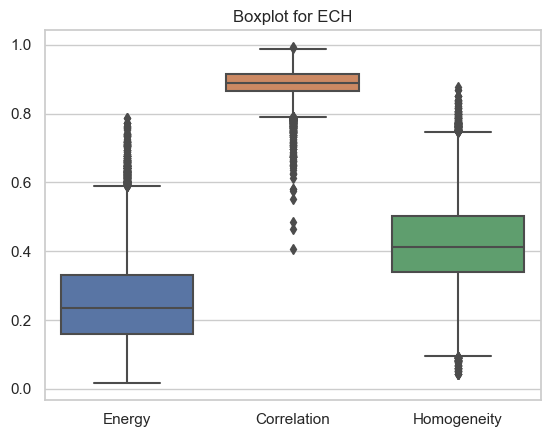

In [404]:
columns = ['Energy', 'Correlation', 'Homogeneity']
df_ech = df[columns]

sns.boxplot(data=df_ech)
plt.title("Boxplot for ECH")
plt.show()


In [405]:
for col in df.columns:
    df = remove_outliers(df, col)


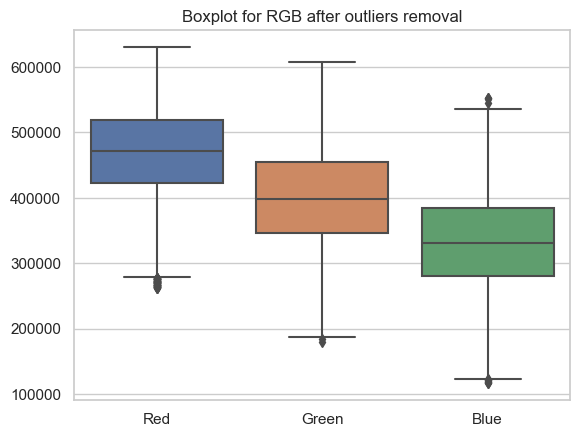

In [406]:
columns = ['Red', 'Green', 'Blue']
df_rgb = df[columns]

sns.boxplot(data=df_rgb)
plt.title("Boxplot for RGB after outliers removal")
plt.show()


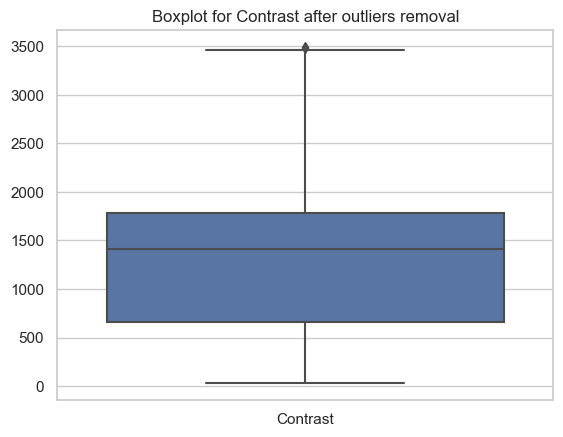

In [407]:
columns = ['Contrast']
df_contrast = df[columns]

sns.boxplot(data=df_contrast)
plt.title("Boxplot for Contrast after outliers removal")
plt.show()


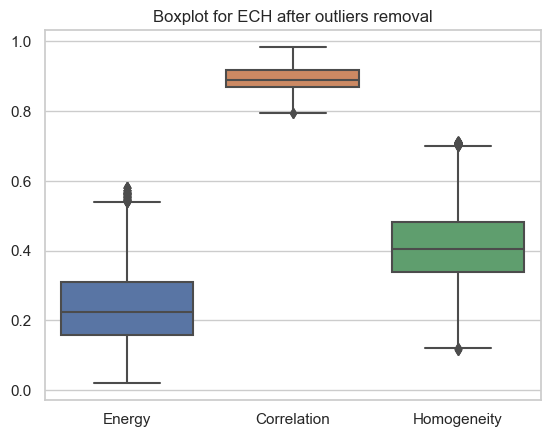

In [408]:
columns = ['Energy', 'Correlation', 'Homogeneity']
df_ech = df[columns]

sns.boxplot(data=df_ech)
plt.title("Boxplot for ECH after outliers removal")
plt.show()


In [409]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9764 entries, 0 to 10900
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Red          9764 non-null   int64  
 1   Green        9764 non-null   int64  
 2   Blue         9764 non-null   int64  
 3   Contrast     9764 non-null   float64
 4   Energy       9764 non-null   float64
 5   Correlation  9764 non-null   float64
 6   Homogeneity  9764 non-null   float64
 7   Freshness    9764 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 686.5 KB


# Correlation Matrix

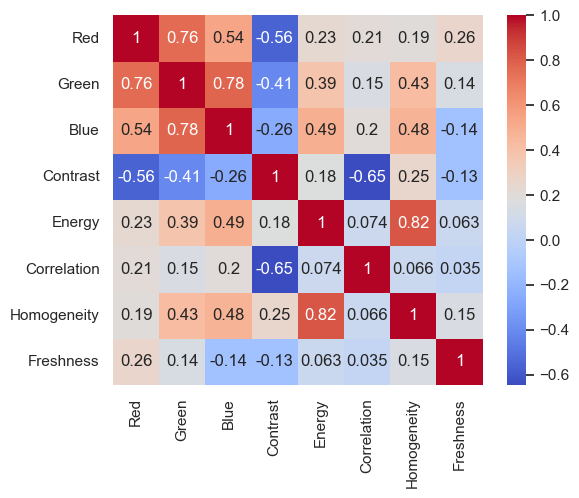

<Figure size 1000x800 with 0 Axes>

In [410]:

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.figure(figsize=(10, 8))
plt.show()


** Since the correlation between the features and freshness are not relatively storng, considering to use non-linear maching learning models here.

# Distribution for Each Columns

In [411]:
skewness = df.skew()

print("Skewness for each column:")
print(skewness)


Skewness for each column:
Red           -0.219872
Green          0.120736
Blue           0.051449
Contrast       0.238257
Energy         0.553582
Correlation    0.059359
Homogeneity    0.300997
Freshness      0.227631
dtype: float64


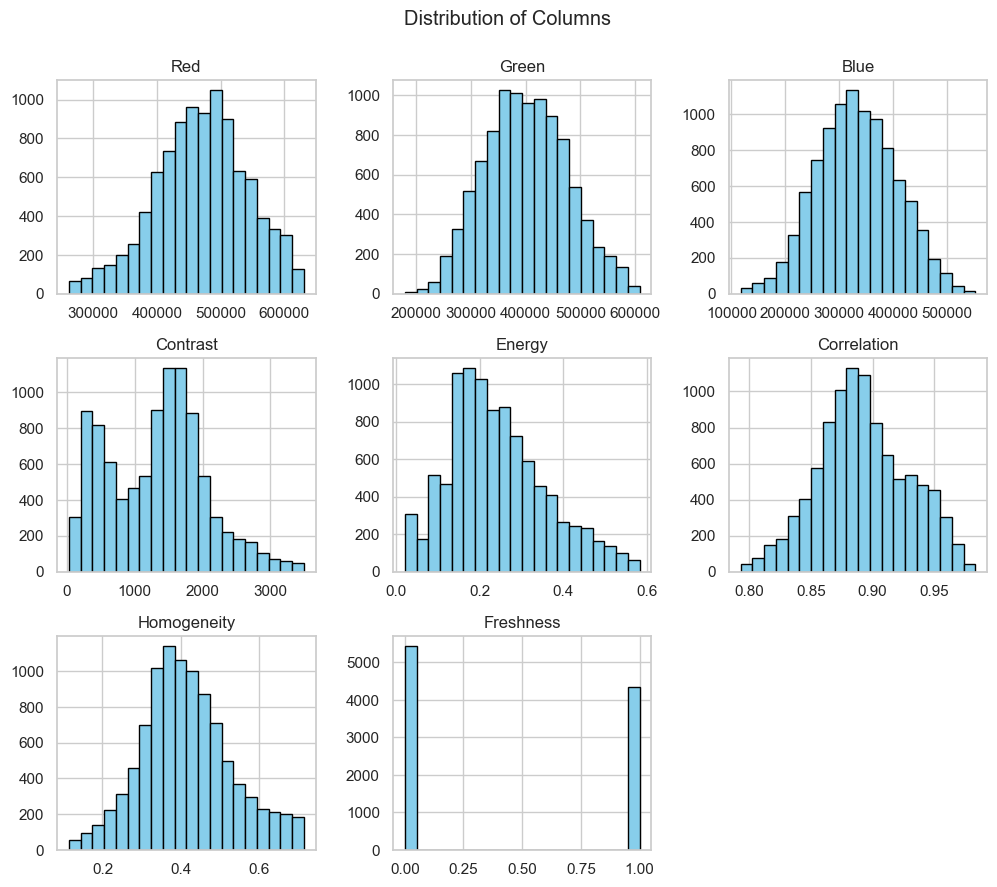

In [412]:
# Assuming df is your DataFrame
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Columns', y=0.95)
plt.show()


** Only Energy is relatively left-skewed

/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

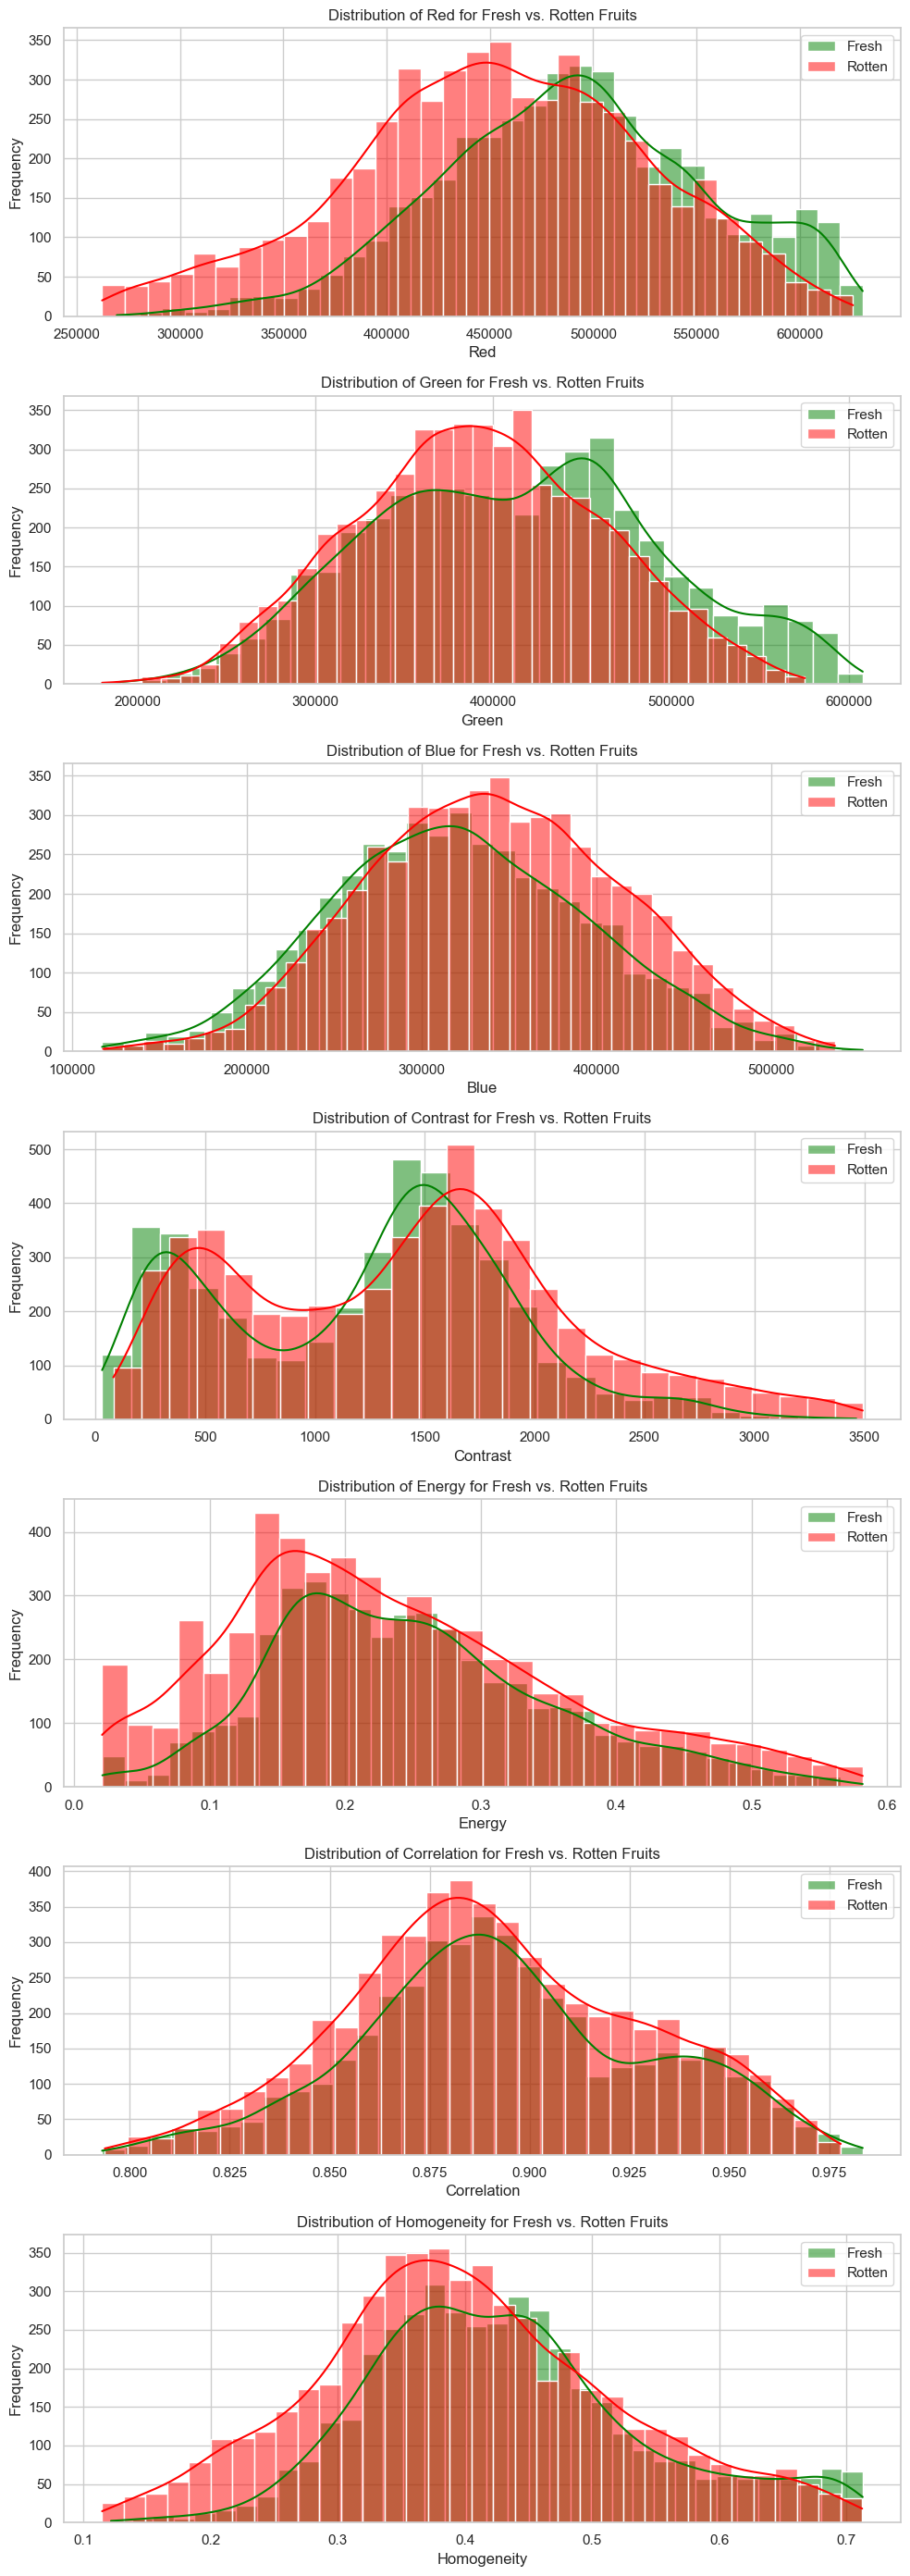

In [413]:
# Filter the DataFrame for fresh and rotten fruits
fresh_df = df[df["Freshness"] == 1]
rotten_df = df[df["Freshness"] == 0]

# List of feature names to visualize
feature_names = ["Red", "Green", "Blue", "Contrast", "Energy", "Correlation", "Homogeneity"]

# Set up Seaborn styles
sns.set_theme(style="whitegrid")

# Create a plot for each feature with fresh vs. rotten comparison
fig, axs = plt.subplots(len(feature_names), 1, figsize=(10, len(feature_names) * 4))

for i, feature in enumerate(feature_names):
    sns.histplot(fresh_df[feature], kde=True, ax=axs[i], color="green", label="Fresh", alpha=0.5)
    sns.histplot(rotten_df[feature], kde=True, ax=axs[i], color="red", label="Rotten", alpha=0.5)
    axs[i].set_title(f"Distribution of {feature} for Fresh vs. Rotten Fruits")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Frequency")
    axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [414]:
# This two features doesn't differentiate fresh or rotten
feature_names.remove("Energy")
feature_names.remove("Correlation")


# Feature Extraction

In [415]:
x = df.drop(columns=['Energy','Correlation','Freshness'])
y = df['Freshness']


# Scaling the Data

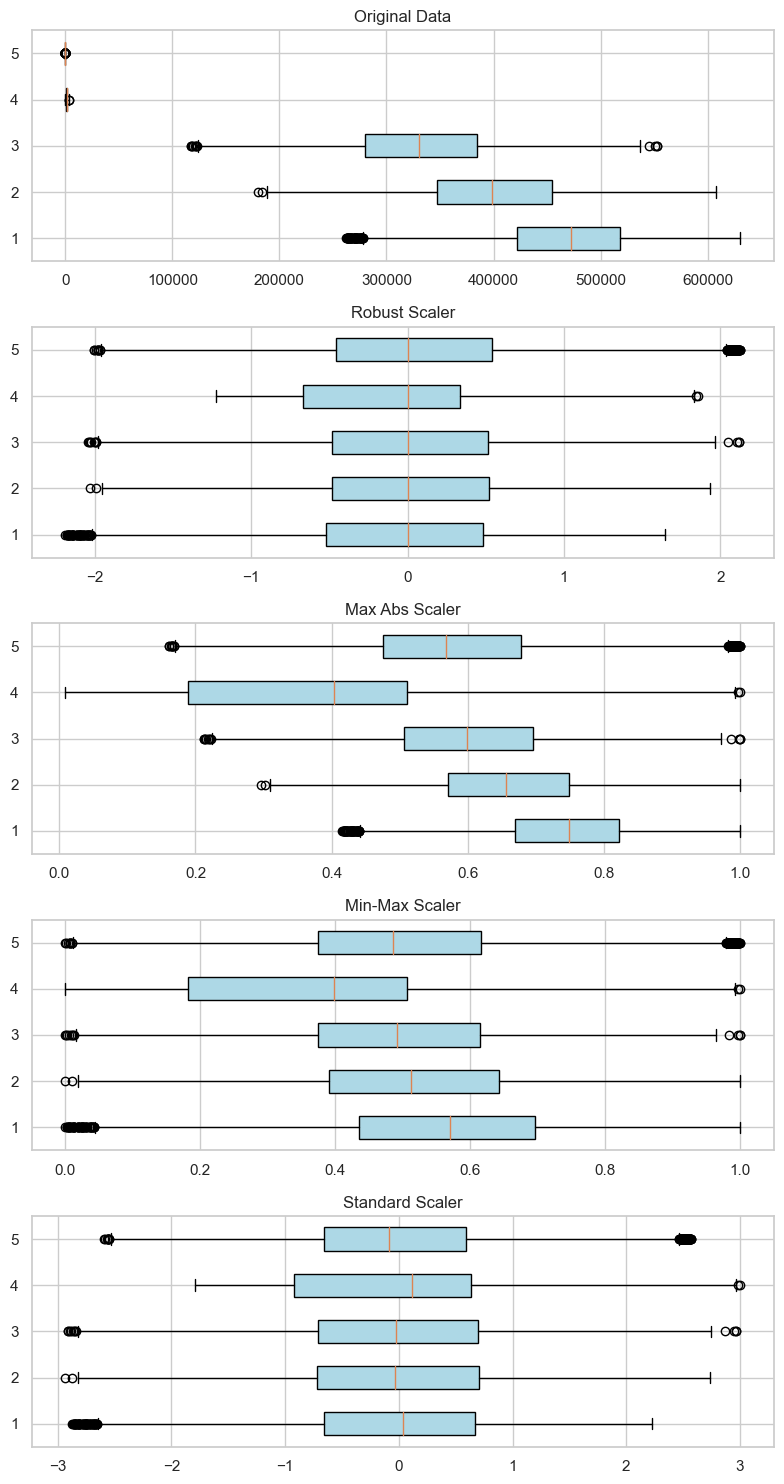

In [416]:
scalers = {
    'Robust Scaler': RobustScaler(),
    'Max Abs Scaler': MaxAbsScaler(),
    'Min-Max Scaler': MinMaxScaler(),
    'Standard Scaler': StandardScaler()
}

x_robust_scale = scalers['Robust Scaler'].fit_transform(x)
x_max_abs_scale = scalers['Max Abs Scaler'].fit_transform(x)
x_min_max_scale = scalers['Min-Max Scaler'].fit_transform(x)
x_standard_scale = scalers['Standard Scaler'].fit_transform(x)

fig, axs = plt.subplots(5, 1, figsize=(8, 15))
axs[0].boxplot(x.values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
axs[0].set_title('Original Data')

scaling_results = {
    'Robust Scaler': x_robust_scale,
    'Max Abs Scaler': x_max_abs_scale,
    'Min-Max Scaler': x_min_max_scale,
    'Standard Scaler': x_standard_scale
}

for idx, (scaler_name, scaled_data) in enumerate(scaling_results.items(), start=1):
    axs[idx].boxplot(scaled_data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axs[idx].set_title(scaler_name)

plt.tight_layout()
plt.show()


** Although there are significant difference for each of the scaler methods, it is important to know which scaler should be paired with which type of machine learning models
** Max Abs Scaler is suitable when the data has positive and negative values, since the data here are all in postiive, this option may not be required
** Min-max Scaler is suitable for Neural Network Models

# Model Selection & Training

Linear
- 1. Logistic Regression

Non-linear
- 2. Support Vector Machine (SVC)
- 3. Decision Tree
- 4. Random Forest
- 5. K Neighbors (KNN)
- 6. Naive Bayes
- 7. XGBoost
- 8. AdaBoost

Neural Network



In [417]:
x_train, x_test, y_train, y_test = train_test_split(x_standard_scale, y, test_size=0.3, random_state=42)

num_rotten = (y_train == 0).sum()
num_fresh = (y_train == 1).sum()

print("Number of instances labeled as 'rotten':", num_rotten)
print("Number of instances labeled as 'fresh':", num_fresh)


Number of instances labeled as 'rotten': 3812
Number of instances labeled as 'fresh': 3022


In [418]:
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

num_rotten_resampled = (y_train == 0).sum()
num_fresh_resampled = (y_train == 1).sum()

print("Number of instances labeled as 'rotten' after resampled:", num_rotten_resampled)
print("Number of instances labeled as 'fresh' after resampled:", num_fresh_resampled)


Number of instances labeled as 'rotten' after resampled: 3812
Number of instances labeled as 'fresh' after resampled: 3812


## Logistic Regression Classifier

In [419]:
logisticModel = LogisticRegression()
logisticModel.fit(x_train, y_train)


LogisticRegression()

In [420]:
logisticModelAccuracy = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
logisticModelPrecision = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
logisticModelSenstivity = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
logisticModelF1Score = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
logisticModelMCCScore = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
logisticModelKappaCoeff = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [421]:
print("Train Accuracy: ", logisticModelAccuracy*100)
print("Train Precision: ", logisticModelPrecision*100)
print("Train Senstivity: ", logisticModelSenstivity*100)
print("Train F1 Score: ", logisticModelF1Score*100)
print("Train MCC Score: ", logisticModelMCCScore*100)
print("Train Kappa Coefficient: ", logisticModelKappaCoeff*100)


Train Accuracy:  7371.494004425915
Train Precision:  7394.028016863263
Train Senstivity:  7337.3318569553785
Train F1 Score:  7360.645739684533
Train MCC Score:  4749.160972824706
Train Kappa Coefficient:  4742.882443766669


In [422]:
y_pred_logistic = logisticModel.predict(x_test)


In [423]:
mse_logistic = mean_squared_error(y_test, y_pred_logistic)
rmse_logistic = np.sqrt(mse_logistic)
mae_logistic = mean_absolute_error(y_test, y_pred_logistic)

print(f"MSE: {mse_logistic}")
print(f"RMSE: {rmse_logistic}")
print(f"MAE: {mae_logistic}")


MSE: 0.2757679180887372
RMSE: 0.5251360948256529
MAE: 0.2757679180887372


In [424]:
logisticModelTestAccuracy = accuracy_score(y_test, y_pred_logistic)*100
logisticModelTestPrecision = precision_score(y_test, y_pred_logistic)*100
logisticModelTestSenstivity = recall_score(y_test, y_pred_logistic)*100
logisticModelTestF1Score = f1_score(y_test, y_pred_logistic)*100
logisticModelTestMCCScore = matthews_corrcoef(y_test, y_pred_logistic)*100
logisticModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_logistic)*100

print(f"Test Accuracy: {logisticModelTestAccuracy*100}")
print(f"Test Precision: {logisticModelPrecision*100}")
print(f"Test Senstivity: {logisticModelSenstivity*100}")
print(f"Test F1 Score: {logisticModelF1Score*100}")
print(f"Test MCC Score: {logisticModelMCCScore*100}")
print(f"Test Kappa Coefficient: {logisticModelKappaCoeff*100}")


Test Accuracy: 7242.320819112628
Test Precision: 7394.028016863263
Test Senstivity: 7337.3318569553785
Test F1 Score: 7360.645739684533
Test MCC Score: 4749.160972824706
Test Kappa Coefficient: 4742.882443766669


In [425]:
report_logistic = classification_report(y_test, y_pred_logistic)
print(report_logistic)


              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1622
           1       0.69      0.70      0.69      1308

    accuracy                           0.72      2930
   macro avg       0.72      0.72      0.72      2930
weighted avg       0.72      0.72      0.72      2930



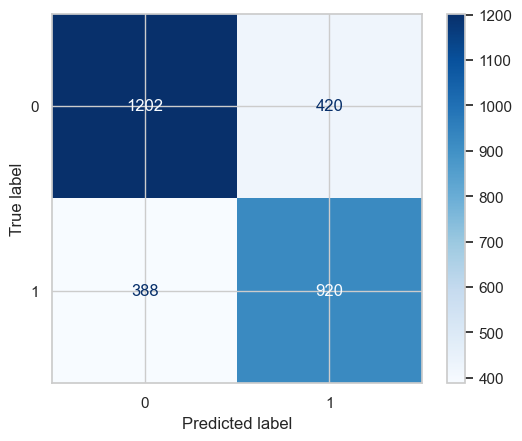

In [426]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Support Vector Machine Classifier (SVM)

In [427]:
svmModel = SVC()
svmModel.fit(x_train, y_train)


SVC()

In [428]:
svmModelAccuracy = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
svmModelPrecision = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
svmModelSenstivity = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
svmModelF1Score = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
svmModelMCCScore = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
svmModelKappaCoeff = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [429]:
print("Train Accuracy: ", svmModelAccuracy*100)
print("Train Precision: ", svmModelPrecision*100)
print("Train Senstivity: ", svmModelSenstivity*100)
print("Train F1 Score: ", svmModelF1Score*100)
print("Train MCC Score: ", svmModelMCCScore*100)
print("Train Kappa Coefficient: ", svmModelKappaCoeff*100)


Train Accuracy:  8549.297514281303
Train Precision:  8596.243453940791
Train Senstivity:  8494.156003937009
Train F1 Score:  8539.495363566963
Train MCC Score:  7107.630400589809
Train Kappa Coefficient:  7098.558190785962


In [430]:
y_pred_svm = svmModel.predict(x_test)


In [431]:
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

print(f"MSE: {mse_svm}")
print(f"RMSE: {rmse_svm}")
print(f"MAE: {mae_svm}")


MSE: 0.15563139931740613
RMSE: 0.39450145667336406
MAE: 0.15563139931740613


In [432]:
svmModelTestAccuracy = accuracy_score(y_test, y_pred_svm)*100
svmModelTestPrecision = precision_score(y_test, y_pred_svm)*100
svmModelTestSenstivity = recall_score(y_test, y_pred_svm)*100
svmModelTestF1Score = f1_score(y_test, y_pred_svm)*100
svmModelTestMCCScore = matthews_corrcoef(y_test, y_pred_svm)*100
svmModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_svm)*100

print(f"Test Accuracy: {svmModelTestAccuracy*100}")
print(f"Test Precision: {svmModelTestPrecision*100}")
print(f"Test Senstivity: {svmModelTestSenstivity*100}")
print(f"Test F1 Score: {svmModelTestF1Score*100}")
print(f"Test MCC Score: {svmModelTestMCCScore*100}")
print(f"Test Kappa Coefficient: {svmModelTestKappaCoeff*100}")


Test Accuracy: 8443.68600682594
Test Precision: 8297.213622291023
Test Senstivity: 8195.718654434251
Test F1 Score: 8246.153846153848
Test MCC Score: 6847.895010536217
Test Kappa Coefficient: 6847.476055465998


In [433]:
report_svm = classification_report(y_test, y_pred_svm)
print(report_svm)


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1622
           1       0.83      0.82      0.82      1308

    accuracy                           0.84      2930
   macro avg       0.84      0.84      0.84      2930
weighted avg       0.84      0.84      0.84      2930



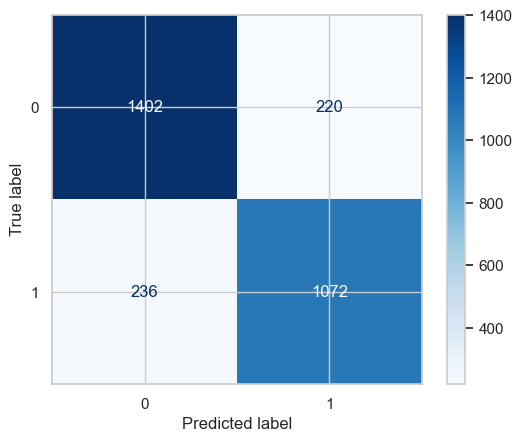

In [434]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Decision Tree Classifier

In [435]:
decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel.fit(x_train, y_train)


DecisionTreeClassifier()

In [436]:
decisionTreeModelAccuracy = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
decisionTreeModelPrecision = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
decisionTreeModelSenstivity = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
decisionTreeModelF1Score = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
decisionTreeModelMCCScore = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
decisionTreeModelKappaCoeff = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [437]:
print("Train Accuracy: ", decisionTreeModelAccuracy*100)
print("Train Precision: ", decisionTreeModelPrecision*100)
print("Train Senstivity: ", decisionTreeModelSenstivity*100)
print("Train F1 Score: ", decisionTreeModelF1Score*100)
print("Train MCC Score: ", decisionTreeModelMCCScore*100)
print("Train Kappa Coefficient: ", decisionTreeModelKappaCoeff*100)


Train Accuracy:  8641.145592095105
Train Precision:  8672.524078859797
Train Senstivity:  8580.790682414698
Train F1 Score:  8635.653483094515
Train MCC Score:  7281.0656401081405
Train Kappa Coefficient:  7316.385459108208


In [438]:
y_pred_decision_tree = decisionTreeModel.predict(x_test)


In [439]:
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)

print(f"MSE: {mse_decision_tree}")
print(f"RMSE: {rmse_decision_tree}")
print(f"MAE: {mae_decision_tree}")


MSE: 0.14948805460750852
RMSE: 0.38663685107282325
MAE: 0.14948805460750852


In [440]:
decisionTreeModelTestAccuracy = accuracy_score(y_test, y_pred_decision_tree)*100
decisionTreeModelTestPrecision = precision_score(y_test, y_pred_decision_tree)*100
decisionTreeModelTestSenstivity = recall_score(y_test, y_pred_decision_tree)*100
decisionTreeModelTestF1Score = f1_score(y_test, y_pred_decision_tree)*100
decisionTreeModelTestMCCScore = matthews_corrcoef(y_test, y_pred_decision_tree)*100
decisionTreeModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_decision_tree)*100

print(f"Test Accuracy: {decisionTreeModelTestAccuracy*100}")
print(f"Test Precision: {decisionTreeModelTestPrecision*100}")
print(f"Test Senstivity: {decisionTreeModelTestSenstivity*100}")
print(f"Test F1 Score: {decisionTreeModelTestF1Score*100}")
print(f"Test MCC Score: {decisionTreeModelTestMCCScore*100}")
print(f"Test Kappa Coefficient: {decisionTreeModelTestKappaCoeff*100}")


Test Accuracy: 8505.119453924914
Test Precision: 8377.329192546584
Test Senstivity: 8249.235474006116
Test F1 Score: 8312.788906009246
Test MCC Score: 6971.686987690813
Test Kappa Coefficient: 6971.020129944921


In [441]:
report_decision_tree = classification_report(y_test, y_pred_decision_tree)
print(report_decision_tree)


              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1622
           1       0.84      0.82      0.83      1308

    accuracy                           0.85      2930
   macro avg       0.85      0.85      0.85      2930
weighted avg       0.85      0.85      0.85      2930



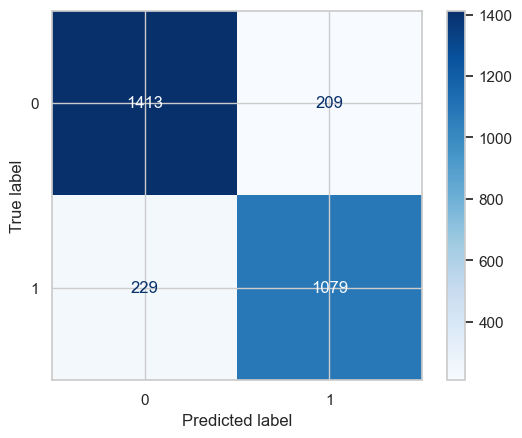

In [442]:
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Random Forest Classifier

In [443]:
randomForestModel = RandomForestClassifier()
randomForestModel.fit(x_train, y_train)


RandomForestClassifier()

In [444]:
randomForestModelAccuracy = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
randomForestModelPrecision = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
randomForestModelSenstivity = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
randomForestModelF1Score = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
randomForestModelMCCScore = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
randomForestModelKappaCoeff = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [445]:
print("Accuracy: ", randomForestModelAccuracy*100)
print("Precision: ", randomForestModelPrecision*100)
print("Senstivity: ", randomForestModelSenstivity*100)
print("F1 Score: ", randomForestModelF1Score*100)
print("MCC Score: ", randomForestModelMCCScore*100)
print("Kappa Coefficient: ", randomForestModelKappaCoeff*100)


Accuracy:  9154.037362976685
Precision:  9174.92087057908
Senstivity:  9176.201607611547
F1 Score:  9152.793694569416
MCC Score:  8326.089987101403
Kappa Coefficient:  8318.549968458121


In [446]:
y_pred_random_forest = randomForestModel.predict(x_test)


In [447]:
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)

print(f"MSE: {mse_random_forest}")
print(f"RMSE: {rmse_random_forest}")
print(f"MAE: {mae_random_forest}")


MSE: 0.1
RMSE: 0.31622776601683794
MAE: 0.1


In [448]:
randomForestModelTestAccuracy = accuracy_score(y_test, y_pred_random_forest)*100
randomForestModelTestPrecision = precision_score(y_test, y_pred_random_forest)*100
randomForestModelTestSenstivity = recall_score(y_test, y_pred_random_forest)*100
randomForestTestModelF1Score = f1_score(y_test, y_pred_random_forest)*100
randomForestModelTestMCCScore = matthews_corrcoef(y_test, y_pred_random_forest)*100
randomForestModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_random_forest)*100

print(f"Test Accuracy: {randomForestModelTestAccuracy*100}")
print(f"Test Precision: {randomForestModelTestPrecision*100}")
print(f"Test Senstivity: {randomForestModelTestSenstivity*100}")
print(f"Test F1 Score: {randomForestTestModelF1Score*100}")
print(f"Test MCC Score: {randomForestModelTestMCCScore*100}")
print(f"Test Kappa Coefficient: {randomForestModelTestKappaCoeff*100}")


Test Accuracy: 9000.0
Test Precision: 8980.392156862747
Test Senstivity: 8753.822629969418
Test F1 Score: 8865.66008517228
Test MCC Score: 7973.891241731465
Test Kappa Coefficient: 7971.810555212993


In [449]:
report_random_forest = classification_report(y_test, y_pred_random_forest)
print(report_random_forest)


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1622
           1       0.90      0.88      0.89      1308

    accuracy                           0.90      2930
   macro avg       0.90      0.90      0.90      2930
weighted avg       0.90      0.90      0.90      2930



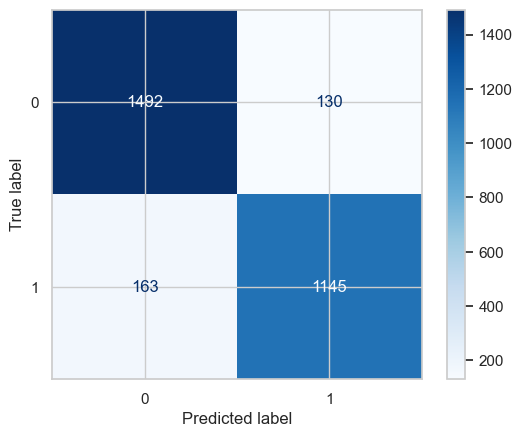

In [450]:
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_random_forest)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## K Neighbors Classifier (KNN)

In [451]:
KNNModel = KNeighborsClassifier()
KNNModel.fit(x_train, y_train)


KNeighborsClassifier()

In [452]:
KNNModelAccuracy = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
KNNModelPrecision = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
KNNModelSenstivity = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
KNNModelF1Score = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
KNNModelMCCScore = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
KNNModelKappaCoeff = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [453]:
print("Train Accuracy: ", KNNModelAccuracy*100)
print("Train Precision: ", KNNModelPrecision*100)
print("Train Senstivity: ", KNNModelSenstivity*100)
print("Train F1 Score: ", KNNModelF1Score*100)
print("Train MCC Score: ", KNNModelMCCScore*100)
print("Train Kappa Coefficient: ", KNNModelKappaCoeff*100)


Train Accuracy:  8986.166435077967
Train Precision:  8881.664829027555
Train Senstivity:  9131.6437007874
Train F1 Score:  8998.761372177041
Train MCC Score:  7987.5253561829495
Train Kappa Coefficient:  7972.270489286548


In [454]:
y_pred_knn = KNNModel.predict(x_test)


In [455]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"MAE: {mae_knn}")


MSE: 0.12627986348122866
RMSE: 0.3553587813481308
MAE: 0.12627986348122866


In [456]:
KNNModelTestAccuracy = accuracy_score(y_test, y_pred_knn)*100
KNNModelTestPrecision = precision_score(y_test, y_pred_knn)*100
KNNModelTestSenstivity = recall_score(y_test, y_pred_knn)*100
KNNModelTestF1Score = f1_score(y_test, y_pred_knn)*100
KNNModelTestMCCScore = matthews_corrcoef(y_test, y_pred_knn)*100
KNNModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_knn)*100

print(f"Test Accuracy: {KNNModelTestAccuracy*100}")
print(f"Test Precision: {KNNModelTestPrecision*100}")
print(f"Test Senstivity: {KNNModelTestSenstivity*100}")
print(f"Test F1 Score: {KNNModelTestF1Score*100}")
print(f"Test MCC Score: {KNNModelTestMCCScore*100}")
print(f"Test Kappa Coefficient: {KNNModelTestKappaCoeff*100}")


Test Accuracy: 8737.201365187713
Test Precision: 8510.479041916167
Test Senstivity: 8692.660550458715
Test F1 Score: 8600.605143721634
Test MCC Score: 7451.729928801278
Test Kappa Coefficient: 7450.342713826899


In [457]:
report_knn = classification_report(y_test, y_pred_knn)
print(report_knn)


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1622
           1       0.85      0.87      0.86      1308

    accuracy                           0.87      2930
   macro avg       0.87      0.87      0.87      2930
weighted avg       0.87      0.87      0.87      2930



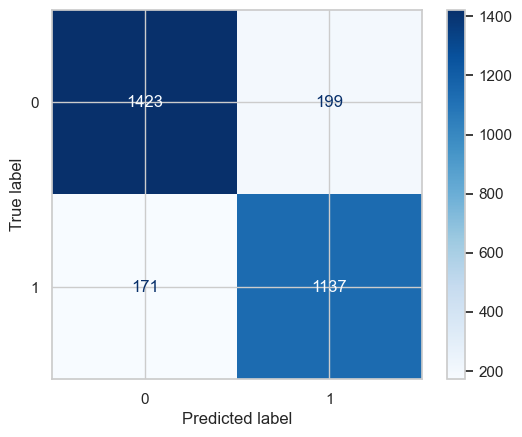

In [458]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Naive Bayes Classifier

In [459]:
naiveBayesModel = GaussianNB()
naiveBayesModel.fit(x_train, y_train)


GaussianNB()

In [460]:
naiveBayesModelAccuracy = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
naiveBayesModelPrecision = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
naiveBayesModelSenstivity = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
naiveBayesModelF1Score = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
naiveBayesModelMCCScore = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
naiveBayesModelKappaCoeff = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [461]:
print("Train Accuracy: ", naiveBayesModelAccuracy*100)
print("Train Precision: ", naiveBayesModelPrecision*100)
print("Train Senstivity: ", naiveBayesModelSenstivity*100)
print("Train F1 Score: ", naiveBayesModelF1Score*100)
print("Train MCC Score: ", naiveBayesModelMCCScore*100)
print("Train Kappa Coefficient: ", naiveBayesModelKappaCoeff*100)


Train Accuracy:  6537.296073284958
Train Precision:  6479.190442912921
Train Senstivity:  6739.173228346456
Train F1 Score:  6601.154551828718
Train MCC Score:  3082.412406496794
Train Kappa Coefficient:  3074.4519545851017


In [462]:
y_pred_naive_bayes = naiveBayesModel.predict(x_test)


In [463]:
mse_naive_bayes = mean_squared_error(y_test, y_pred_naive_bayes)
rmse_naive_bayes = np.sqrt(mse_naive_bayes)
mae_naive_bayes = mean_absolute_error(y_test, y_pred_naive_bayes)

print(f"MSE: {mse_naive_bayes}")
print(f"RMSE: {rmse_naive_bayes}")
print(f"MAE: {mae_naive_bayes}")


MSE: 0.37679180887372016
RMSE: 0.6138336980597596
MAE: 0.37679180887372016


In [464]:
naiveBayesModelTestAccuracy = accuracy_score(y_test, y_pred_naive_bayes)*100
naiveBayesModelTestPrecision = precision_score(y_test, y_pred_naive_bayes)*100
naiveBayesModelTestSenstivity = recall_score(y_test, y_pred_naive_bayes)*100
naiveBayesModelTestF1Score = f1_score(y_test, y_pred_naive_bayes)*100
naiveBayesModelTestMCCScore = matthews_corrcoef(y_test, y_pred_naive_bayes)*100
naiveBayesModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_naive_bayes)*100

print(f"Test Accuracy: {naiveBayesModelTestAccuracy*100}")
print(f"Test Precision: {naiveBayesModelTestPrecision*100}")
print(f"Test Senstivity: {naiveBayesModelTestSenstivity*100}")
print(f"Test F1 Score: {naiveBayesModelTestF1Score*100}")
print(f"Test MCC Score: {naiveBayesModelTestMCCScore*100}")
print(f"Test Kappa Coefficient: {naiveBayesModelTestKappaCoeff*100}")


Test Accuracy: 6232.081911262799
Test Precision: 5698.630136986301
Test Senstivity: 6360.856269113149
Test F1 Score: 6011.560693641619
Test MCC Score: 2474.772762744032
Test Kappa Coefficient: 2461.4065180102907


In [465]:
report_naive_bayes = classification_report(y_test, y_pred_naive_bayes)
print(report_naive_bayes)


              precision    recall  f1-score   support

           0       0.68      0.61      0.64      1622
           1       0.57      0.64      0.60      1308

    accuracy                           0.62      2930
   macro avg       0.62      0.62      0.62      2930
weighted avg       0.63      0.62      0.62      2930



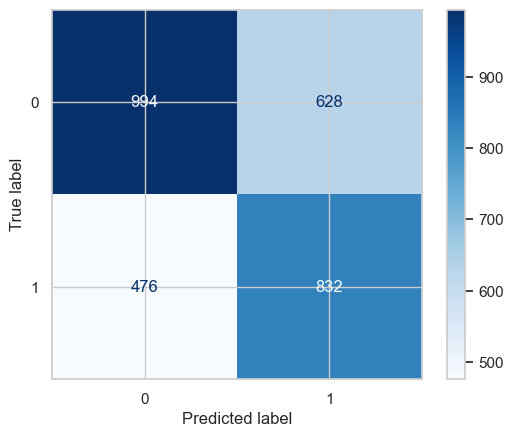

In [466]:
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_naive_bayes)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## XGBoost

In [467]:
xgboostModel = XGBClassifier()
xgboostModel.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [468]:
xgboostModelAccuracy = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
xgboostModelPrecision = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
xgboostModelSenstivity = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
xgboostModelF1Score = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
xgboostModelMCCScore = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
xgboostModelKappaCoeff = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [469]:
print("Train Accuracy: ", xgboostModelAccuracy*100)
print("Train Precision: ", xgboostModelPrecision*100)
print("Train Senstivity: ", xgboostModelSenstivity*100)
print("Train F1 Score: ", xgboostModelF1Score*100)
print("Train MCC Score: ", xgboostModelMCCScore*100)
print("Train Kappa Coefficient: ", xgboostModelKappaCoeff*100)


Train Accuracy:  9016.314137203437
Train Precision:  8971.703535512197
Train Senstivity:  9079.191272965876
Train F1 Score:  9021.351739753547
Train MCC Score:  8040.349648550983
Train Kappa Coefficient:  8032.590553723433


In [470]:
y_pred_xgboost = xgboostModel.predict(x_test)


In [471]:
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)

print(f"MSE: {mse_xgboost}")
print(f"RMSE: {rmse_xgboost}")
print(f"MAE: {mae_xgboost}")


MSE: 0.10273037542662115
RMSE: 0.3205157959081286
MAE: 0.10273037542662115


In [472]:
xgboostModelTestAccuracy = accuracy_score(y_test, y_pred_xgboost)*100
xgboostModelTestPrecision = precision_score(y_test, y_pred_xgboost)*100
xgboostModelTestSenstivity = recall_score(y_test, y_pred_xgboost)*100
xgboostModelTestF1Score = f1_score(y_test, y_pred_xgboost)*100
xgboostModelTestMCCScore = matthews_corrcoef(y_test, y_pred_xgboost)*100
xgboostModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_xgboost)*100

print(f"Test Accuracy: {xgboostModelTestAccuracy*100}")
print(f"Test Precision: {xgboostModelTestPrecision*100}")
print(f"Test Senstivity: {xgboostModelTestSenstivity*100}")
print(f"Test F1 Score: {xgboostModelTestF1Score*100}")
print(f"Test MCC Score: {xgboostModelTestMCCScore*100}")
print(f"Test Kappa Coefficient: {xgboostModelTestKappaCoeff*100}")


Test Accuracy: 8972.696245733789
Test Precision: 8906.128782001551
Test Senstivity: 8776.758409785933
Test F1 Score: 8840.970350404312
Test MCC Score: 7919.278566381003
Test Kappa Coefficient: 7918.5950298146


In [473]:
report_xgboost = classification_report(y_test, y_pred_xgboost)
print(report_xgboost)


              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1622
           1       0.89      0.88      0.88      1308

    accuracy                           0.90      2930
   macro avg       0.90      0.90      0.90      2930
weighted avg       0.90      0.90      0.90      2930



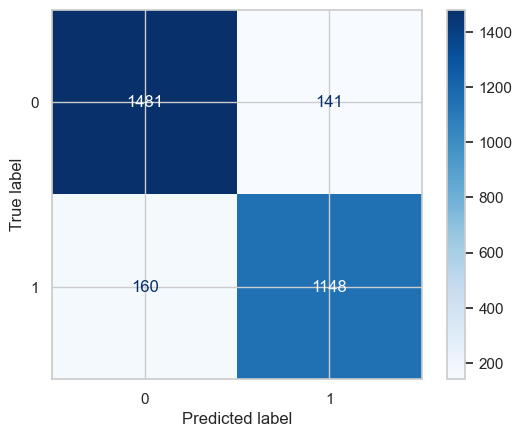

In [474]:
cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgboost)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## AdaBoost

In [475]:
adaboostModel = AdaBoostClassifier()
adaboostModel.fit(x_train, y_train)


/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [476]:
adaboostModelAccuracy = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
adaboostModelPrecision = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
adaboostModelSenstivity = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
adaboostModelF1Score = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
adaboostModelMCCScore = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
adaboostModelKappaCoeff = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecat

In [477]:
print("Train Accuracy: ", adaboostModelAccuracy*100)
print("Train Precision: ", adaboostModelPrecision*100)
print("Train Senstivity: ", adaboostModelSenstivity*100)
print("Train F1 Score: ", adaboostModelF1Score*100)
print("Train MCC Score: ", adaboostModelMCCScore*100)
print("Train Kappa Coefficient: ", adaboostModelKappaCoeff*100)


Train Accuracy:  7548.546137615149
Train Precision:  7512.617461709035
Train Senstivity:  7636.380413385825
Train F1 Score:  7568.58310714984
Train MCC Score:  5105.205235782601
Train Kappa Coefficient:  5096.984060993945


In [478]:
y_pred_adaboost = adaboostModel.predict(x_test)


In [479]:
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)

print(f"MSE: {mse_adaboost}")
print(f"RMSE: {rmse_adaboost}")
print(f"MAE: {mae_adaboost}")


MSE: 0.24914675767918087
RMSE: 0.49914602841170724
MAE: 0.24914675767918087


In [480]:
adaboostModelTestAccuracy = accuracy_score(y_test, y_pred_adaboost)*100
adaboostModelTestPrecision = precision_score(y_test, y_pred_adaboost)*100
adaboostModelTestSenstivity = recall_score(y_test, y_pred_adaboost)*100
adaboostModelTestF1Score = f1_score(y_test, y_pred_adaboost)*100
adaboostModelTestMCCScore = matthews_corrcoef(y_test, y_pred_adaboost)*100
adaboostModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_adaboost)*100

print(f"Test Accuracy: {adaboostModelTestAccuracy*100}")
print(f"Test Precision: {adaboostModelTestPrecision*100}")
print(f"Test Senstivity: {adaboostModelTestSenstivity*100}")
print(f"Test F1 Score: {adaboostModelTestF1Score*100}")
print(f"Test MCC Score: {adaboostModelTestMCCScore*100}")
print(f"Test Kappa Coefficient: {adaboostModelTestKappaCoeff*100}")


Test Accuracy: 7508.53242320819
Test Precision: 7118.768328445748
Test Senstivity: 7423.547400611621
Test F1 Score: 7267.964071856288
Test MCC Score: 4983.672062170667
Test Kappa Coefficient: 4979.975290654009


In [481]:
report_adaboost = classification_report(y_test, y_pred_adaboost)
print(report_adaboost)


              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1622
           1       0.71      0.74      0.73      1308

    accuracy                           0.75      2930
   macro avg       0.75      0.75      0.75      2930
weighted avg       0.75      0.75      0.75      2930



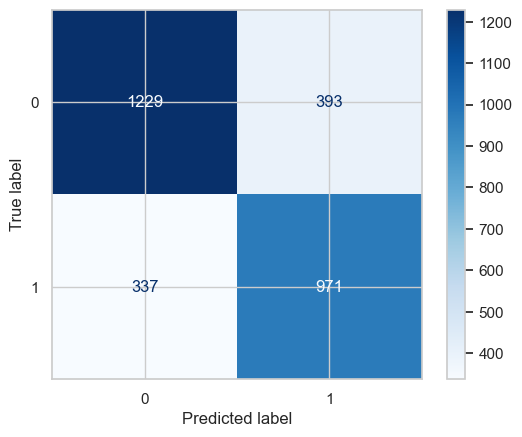

In [482]:
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Model Comparison

## Metrics Comparison on Train Data

### Classification Performance Metrics

In [483]:
arr_train = np.array([["Logistic Regression", logisticModelAccuracy, logisticModelPrecision, logisticModelSenstivity, logisticModelF1Score, logisticModelMCCScore, logisticModelKappaCoeff]])
arr_train = np.insert(arr_train, 0, ["SVM", svmModelAccuracy, svmModelPrecision, svmModelSenstivity, svmModelF1Score, svmModelMCCScore, svmModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["Decision Tree", decisionTreeModelAccuracy, decisionTreeModelPrecision, decisionTreeModelSenstivity, decisionTreeModelF1Score, decisionTreeModelMCCScore, decisionTreeModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["Random Forest", randomForestModelAccuracy, randomForestModelPrecision, randomForestModelSenstivity, randomForestModelF1Score, randomForestModelMCCScore, randomForestModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["KNN", KNNModelAccuracy, KNNModelPrecision, KNNModelSenstivity, KNNModelF1Score, KNNModelMCCScore, KNNModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["Naive Bayes", naiveBayesModelAccuracy, naiveBayesModelPrecision, naiveBayesModelSenstivity, naiveBayesModelF1Score, naiveBayesModelMCCScore, naiveBayesModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["XGBoost", xgboostModelAccuracy, xgboostModelPrecision, xgboostModelSenstivity, xgboostModelF1Score, xgboostModelMCCScore, xgboostModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["AdaBoost", adaboostModelAccuracy, adaboostModelPrecision, adaboostModelSenstivity, adaboostModelF1Score, adaboostModelMCCScore, adaboostModelKappaCoeff], axis=0)


In [484]:
arr_train = pd.DataFrame(arr_train, columns=['Model', 'Accuracy', 'Precision', 'Senstivity', 'F1 Score', 'MCC Score', 'Kappa Coeff'])


In [485]:
arr_train


,Model,Accuracy,Precision,Senstivity,F1 Score,MCC Score,Kappa Coeff
0,AdaBoost,75.48546137615149,75.12617461709034,76.36380413385825,75.6858310714984,51.052052357826014,50.969840609939446
1,XGBoost,90.16314137203437,89.71703535512196,90.79191272965876,90.21351739753547,80.40349648550983,80.32590553723433
2,Naive Bayes,65.37296073284958,64.7919044291292,67.39173228346456,66.01154551828718,30.824124064967943,30.744519545851016
3,KNN,89.86166435077966,88.81664829027555,91.316437007874,89.98761372177042,79.8752535618295,79.72270489286548
4,Random Forest,91.54037362976685,91.7492087057908,91.76201607611547,91.52793694569417,83.26089987101402,83.18549968458122
5,Decision Tree,86.41145592095104,86.72524078859796,85.80790682414698,86.35653483094515,72.8106564010814,73.16385459108209
6,SVM,85.49297514281302,85.96243453940791,84.94156003937009,85.39495363566962,71.0763040058981,70.98558190785963
7,Logistic Regression,73.71494004425915,73.94028016863263,73.37331856955379,73.60645739684533,47.491609728247056,47.42882443766669


** Random Forest and XG Boost classifier are very close to each other. Hence I am going to use both of them with different hyperameters to see which one performs better.

## Metrics Comparison on Test Data

### Classification Performance Metrics

In [486]:
arr_test = np.array([["Logistic Regression", logisticModelTestAccuracy, logisticModelTestPrecision, logisticModelTestSenstivity, logisticModelTestF1Score, logisticModelTestMCCScore, logisticModelTestKappaCoeff]])
arr_test = np.insert(arr_test, 0, ["SVM", svmModelTestAccuracy, svmModelTestPrecision, svmModelTestSenstivity, svmModelTestF1Score, svmModelTestMCCScore, svmModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["Decision Tree", decisionTreeModelTestAccuracy, decisionTreeModelTestPrecision, decisionTreeModelTestSenstivity, decisionTreeModelTestF1Score, decisionTreeModelTestMCCScore, decisionTreeModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["Random Forest", randomForestModelTestAccuracy, randomForestModelTestPrecision, randomForestModelTestSenstivity, randomForestTestModelF1Score, randomForestModelTestMCCScore, randomForestModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["KNN", KNNModelTestAccuracy, KNNModelTestPrecision, KNNModelTestSenstivity, KNNModelTestF1Score, KNNModelTestMCCScore, KNNModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["Naive Bayes", naiveBayesModelTestAccuracy, naiveBayesModelTestPrecision, naiveBayesModelTestSenstivity, naiveBayesModelTestF1Score, naiveBayesModelTestMCCScore, naiveBayesModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["XGBoost", xgboostModelTestAccuracy, xgboostModelTestPrecision, xgboostModelTestSenstivity, xgboostModelTestF1Score, xgboostModelTestMCCScore, xgboostModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["AdaBoost", adaboostModelTestAccuracy, adaboostModelTestPrecision, adaboostModelTestSenstivity, adaboostModelTestF1Score, adaboostModelTestMCCScore, adaboostModelTestKappaCoeff], axis=0)


In [487]:
arr_test = pd.DataFrame(arr_test, columns=['Model', 'Accuracy', 'Precision', 'Senstivity', 'F1 Score', 'MCC Score', 'Kappa Coeff'])


In [488]:
arr_test


,Model,Accuracy,Precision,Senstivity,F1 Score,MCC Score,Kappa Coeff
0,AdaBoost,75.0853242320819,71.18768328445748,74.2354740061162,72.67964071856288,49.836720621706675,49.79975290654009
1,XGBoost,89.72696245733789,89.06128782001551,87.76758409785933,88.40970350404312,79.19278566381003,79.185950298146
2,Naive Bayes,62.32081911262799,56.986301369863014,63.608562691131496,60.115606936416185,24.747727627440323,24.614065180102905
3,KNN,87.37201365187714,85.10479041916167,86.92660550458714,86.00605143721634,74.51729928801278,74.50342713826899
4,Random Forest,90.0,89.80392156862746,87.53822629969419,88.6566008517228,79.73891241731465,79.71810555212993
5,Decision Tree,85.05119453924914,83.77329192546584,82.49235474006116,83.12788906009246,69.71686987690813,69.71020129944921
6,SVM,84.43686006825939,82.97213622291022,81.9571865443425,82.46153846153847,68.47895010536217,68.47476055465998
7,Logistic Regression,72.42320819112628,68.65671641791045,70.33639143730886,69.48640483383686,44.34821716044135,44.337440045142486


### Regression Performance Metrics

In [489]:
arr_regression = np.array([["Logistic Regression", mse_logistic, rmse_logistic, mae_logistic]])
arr_regression = np.insert(arr_regression, 0, ["SVM", mse_svm, rmse_svm, mae_svm], axis=0)
arr_regression = np.insert(arr_regression, 0, ["Decision Tree", mse_decision_tree, rmse_decision_tree, mae_decision_tree], axis=0)
arr_regression = np.insert(arr_regression, 0, ["Random Forest", mse_random_forest, rmse_random_forest, mae_random_forest], axis=0)
arr_regression = np.insert(arr_regression, 0, ["KNN", mse_knn, rmse_knn, mae_knn], axis=0)
arr_regression = np.insert(arr_regression, 0, ["Naive Bayes", mse_naive_bayes, rmse_naive_bayes, mae_naive_bayes], axis=0)
arr_regression = np.insert(arr_regression, 0, ["XGBoost", mse_xgboost, rmse_xgboost, mae_xgboost], axis=0)
arr_regression = np.insert(arr_regression, 0, ["AdaBoost", mse_adaboost, rmse_adaboost, mae_adaboost], axis=0)


In [490]:
arr_regression = pd.DataFrame(arr_regression, columns=['Model', 'MSE', 'RMSE', 'MAE'])


In [491]:
arr_regression


,Model,MSE,RMSE,MAE
0,AdaBoost,0.24914675767918087,0.49914602841170724,0.24914675767918087
1,XGBoost,0.10273037542662115,0.3205157959081286,0.10273037542662115
2,Naive Bayes,0.37679180887372016,0.6138336980597596,0.37679180887372016
3,KNN,0.12627986348122866,0.3553587813481308,0.12627986348122866
4,Random Forest,0.1,0.31622776601683794,0.1
5,Decision Tree,0.14948805460750852,0.38663685107282325,0.14948805460750852
6,SVM,0.15563139931740613,0.39450145667336406,0.15563139931740613
7,Logistic Regression,0.2757679180887372,0.5251360948256529,0.2757679180887372


** The lower the value, the better the performance of hte model

# Final Comparison: Random Forest vs XG Boost using GridSearch

In [494]:
# Random Forest Hyperparameter Grid
random_forest_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],                  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15, 20],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8],                  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', 0.2, 0.4]    # Number of features to consider for the best split
}

# Define Scoring Metrics
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'sensitivity': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'mcc': make_scorer(matthews_corrcoef),
    'kappa': make_scorer(cohen_kappa_score)
}

# Random Forest Grid Search
random_forest_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=random_forest_model, 
    param_grid=random_forest_param_grid, 
    scoring=scorers, 
    refit='f1', 
    cv=5, 
    return_train_score=True
)
grid_search_rf.fit(x_train, y_train)


/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3125 fits failed out of a total of 15625.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3125 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/base.py"

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2', 0.2, 0.4],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             refit='f1', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'kappa': make_scorer(cohen_kappa_score, response_method='predict'),
                      'mcc': make_scorer(matthews_corrcoef, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'sensitivity': make_scorer(recall_score, response_method='predict')})

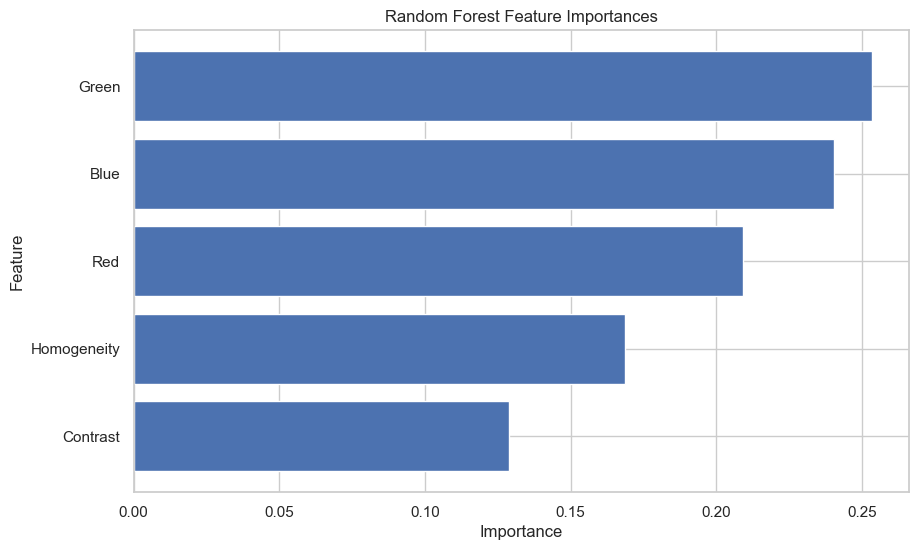

Best Random Forest Model saved successfully.

Random Forest Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Test Accuracy: 8948.805460750853
Test Precision: 8937.007874015748
Test Senstivity: 8677.37003058104
Test F1 Score: 8805.275407292474
Test MCC Score: 7869.912365823544
Test Kappa Coefficient: 7867.187241504815

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1622
           1       0.89      0.87      0.88      1308

    accuracy                           0.89      2930
   macro avg       0.89      0.89      0.89      2930
weighted avg       0.89      0.89      0.89      2930



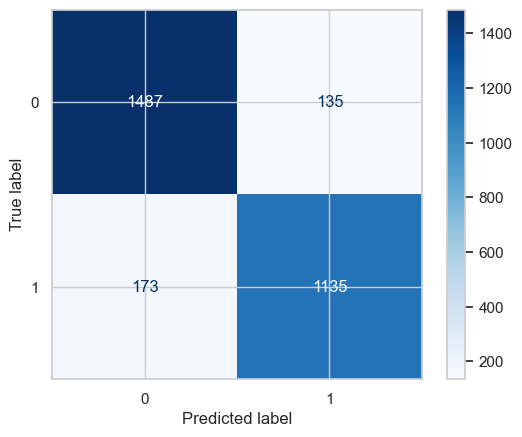

Final MSE: 0.10511945392491467
Final RMSE: 0.3242213039343878
Final MAE: 0.10511945392491467


In [506]:
# Evaluate Random Forest Best Model
rf_best = grid_search_rf.best_estimator_

# Feature importance
importance_values_rf = rf_best.feature_importances_

sorted_indices_rf = importance_values_rf.argsort()[::-1]
sorted_importances_rf = importance_values_rf[sorted_indices_rf]
sorted_feature_names_rf = [feature_names[i] for i in sorted_indices_rf]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances_rf)), sorted_importances_rf, tick_label=sorted_feature_names_rf)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()


rf_saved_name = "best_rf_model_" + str(grid_search_rf.best_params_) + ".pkl"
with open(rf_saved_name, 'wb') as model_file:
    pickle.dump(grid_search_rf, model_file)

print("Best Random Forest Model saved successfully.")

y_pred_rf = rf_best.predict(x_test)
print("\nRandom Forest Best Parameters:", grid_search_rf.best_params_)

finalRfModelTestAccuracy = accuracy_score(y_test, y_pred_rf)*100
finalRfModelTestPrecision = precision_score(y_test, y_pred_rf)*100
finalRfModelTestSenstivity = recall_score(y_test, y_pred_rf)*100
finalRfModelTestF1Score = f1_score(y_test, y_pred_rf)*100
finalRfModelTestMCCScore = matthews_corrcoef(y_test, y_pred_rf)*100
finalRfModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_rf)*100

print(f"\nTest Accuracy: {finalRfModelTestAccuracy*100}")
print(f"Test Precision: {finalRfModelTestPrecision*100}")
print(f"Test Senstivity: {finalRfModelTestSenstivity*100}")
print(f"Test F1 Score: {finalRfModelTestF1Score*100}")
print(f"Test MCC Score: {finalRfModelTestMCCScore*100}")
print(f"Test Kappa Coefficient: {finalRfModelTestKappaCoeff*100}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Blues)
plt.show()

final_mse_rf = mean_squared_error(y_test, y_pred_rf)
final_rmse_rf = np.sqrt(final_mse_rf)
final_mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Final MSE: {final_mse_rf}")
print(f"Final RMSE: {final_rmse_rf}")
print(f"Final MAE: {final_mae_rf}")


In [493]:
# XGBoost Hyperparameter Grid
xgboost_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.85, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5]
}

# XGBoost Grid Search
xgboost_model = XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(
    estimator=xgboost_model, 
    param_grid=xgboost_param_grid, 
    scoring=scorers, 
    refit='f1', 
    cv=5, 
    return_train_score=True
)
grid_search_xgb.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'kappa': make_scorer(cohen_kappa_score, response_method='predict'),
                      'mcc': make_scorer(matthews_corrcoef, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'sensitivity': make_scorer(recall_score, response_method='predict')})

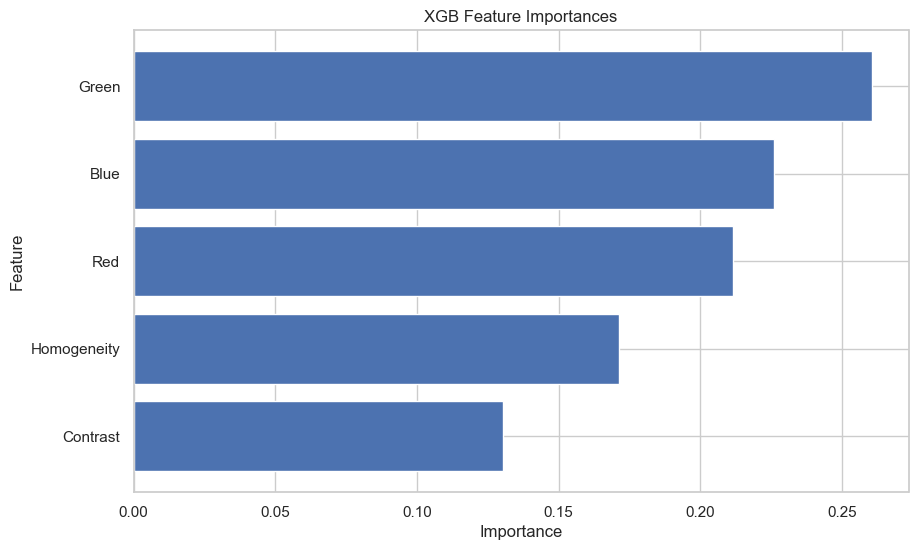

Best XG Boost Model saved successfully.
XGBoost Best Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 300, 'subsample': 0.8}

Test Accuracy: 9058.0204778157
Test Precision: 8975.346687211095
Test Senstivity: 8906.727828746178
Test F1 Score: 8940.90560245587
Test MCC Score: 8092.934480397588
Test Kappa Coefficient: 8092.741246958735

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1622
           1       0.90      0.89      0.89      1308

    accuracy                           0.91      2930
   macro avg       0.90      0.90      0.90      2930
weighted avg       0.91      0.91      0.91      2930



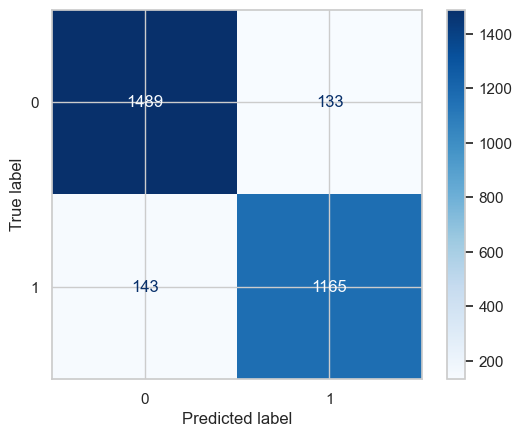

Final MSE: 0.09419795221843004
Final RMSE: 0.3069168490298798
Final MAE: 0.09419795221843004


In [503]:
# Evaluate XGBoost Best Model
xgb_best = grid_search_xgb.best_estimator_

importance_values_xgb = xgb_best.feature_importances_

sorted_indices_xgb = importance_values_xgb.argsort()[::-1]
sorted_importances_xgb = importance_values_xgb[sorted_indices_xgb]
sorted_feature_names_xgb = [feature_names[i] for i in sorted_indices_xgb]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances_xgb)), sorted_importances_xgb, tick_label=sorted_feature_names_xgb)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGB Feature Importances')
plt.gca().invert_yaxis()
plt.show()

xgb_saved_name = "best_xgb_model_" + str(grid_search_xgb.best_params_) + ".pkl"
with open(xgb_saved_name, 'wb') as model_file:
    pickle.dump(xgb_best, model_file)

print("Best XG Boost Model saved successfully.")

y_pred_xgb = xgb_best.predict(x_test)
print("XGBoost Best Parameters:", grid_search_xgb.best_params_)

finalXgbModelTestAccuracy = accuracy_score(y_test, y_pred_xgb)*100
finalXgbModelTestPrecision = precision_score(y_test, y_pred_xgb)*100
finalXgbModelTestSenstivity = recall_score(y_test, y_pred_xgb)*100
finalXgbModelTestF1Score = f1_score(y_test, y_pred_xgb)*100
finalXgbModelTestMCCScore = matthews_corrcoef(y_test, y_pred_xgb)*100
finalXgbModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_xgb)*100

print(f"\nTest Accuracy: {finalXgbModelTestAccuracy*100}")
print(f"Test Precision: {finalXgbModelTestPrecision*100}")
print(f"Test Senstivity: {finalXgbModelTestSenstivity*100}")
print(f"Test F1 Score: {finalXgbModelTestF1Score*100}")
print(f"Test MCC Score: {finalXgbModelTestMCCScore*100}")
print(f"Test Kappa Coefficient: {finalXgbModelTestKappaCoeff*100}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.show()

final_mse_xgb = mean_squared_error(y_test, y_pred_xgb)
final_rmse_xgb= np.sqrt(final_mse_xgb)
final_mae_xgb= mean_absolute_error(y_test, y_pred_xgb)

print(f"Final MSE: {final_mse_xgb}")
print(f"Final RMSE: {final_rmse_xgb}")
print(f"Final MAE: {final_mae_xgb}")


# Conclusion

After applying the GridSearch method, it can be seen that XG Boost performs slightly better than the previous default parameters as well as hypertuned Random Forest. The classification and regression performance of the model has increased by 0.01 - 0.02 in each metrics

# Neural Network Attempt (IGNORE)

In [ ]:
'''
Artificial Neural Network Class
'''
class ANN:
    np.random.seed(10)
    
    '''
    Initialize the ANN;
    HiddenLayer vector : will contain the Layers' info
    w, b, phi = (empty) arrays that will contain all the w, b and activation functions for all the Layers
    mu = cost function
    eta = a standard learning rate initialization. It can be modified by the 'set_learning_rate' method
    '''
    def __init__(self) :
        self.HiddenLayer = []
        self.w = []
        self.b = []
        self.phi = []
        self.mu = []
        self.eta = 1 #set up the proper Learning Rate!!
    
    '''
    add method: to add layers to the network
    '''
    def add(self, lay = (4, 'ReLU') ):
        self.HiddenLayer.append(lay)
    
    '''
    FeedForward method: as explained before. 
    '''
    @staticmethod
    def FeedForward(w, b, phi, x):
        return phi(np.dot(w, x) + b)
        
    '''
    BackPropagation algorithm implementing the Gradient Descent 
    '''
    def BackPropagation(self, x, z, Y, w, b, phi):
        self.delta = []
        
        # We initialize ausiliar w and b that are used only inside the backpropagation algorithm once called        
        self.W = []
        self.B = []
        
        # We start computing the LAST error, the one for the OutPut Layer 
        self.delta.append(  (z[len(z)-1] - Y) * phi[len(z)-1](z[len(z)-1], der=True) )
        
        '''Now we BACKpropagate'''
        # We thus compute from next-to-last to first
        for i in range(0, len(z)-1):
            self.delta.append( np.dot( self.delta[i], w[len(z)- 1 - i] ) * phi[len(z)- 2 - i](z[len(z)- 2 - i], der=True) )
        
        # We have the error array ordered from last to first; we flip it to order it from first to last
        self.delta = np.flip(self.delta, 0)  
        
        # Now we define the delta as the error divided by the number of training samples
        self.delta = self.delta/self.X.shape[0] 
        
        '''GRADIENT DESCENT'''
        # We start from the first layer that is special, since it is connected to the Input Layer
        self.W.append( w[0] - self.eta * np.kron(self.delta[0], x).reshape( len(z[0]), x.shape[0] ) )
        self.B.append( b[0] - self.eta * self.delta[0] )
        
        # We now descend for all the other Hidden Layers + OutPut Layer
        for i in range(1, len(z)):
            self.W.append( w[i] - self.eta * np.kron(self.delta[i], z[i-1]).reshape(len(z[i]), len(z[i-1])) )
            self.B.append( b[i] - self.eta * self.delta[i] )
        
        # We return the descended parameters w, b
        return np.array(self.W), np.array(self.B)
    
    
    '''
    Fit method: it calls FeedForward and Backpropagation methods
    '''
    def Fit(self, x_train, y_train):            
        print('Start fitting...')
        '''
        Input layer
        '''
        self.X = x_train
        self.Y = y_train
        
        '''
        We now initialize the Network by retrieving the Hidden Layers and concatenating them 
        '''
        print('Model recap: \n')
        print('You are fitting an ANN with the following amount of layers: ', len(self.HiddenLayer))
        
        for i in range(0, len(self.HiddenLayer)) :
            print('Layer ', i+1)
            print('Number of neurons: ', self.HiddenLayer[i][0])
            if i==0:
                # We now try to use the He et al. Initialization from ArXiv:1502.01852
                self.w.append( np.random.randn(self.HiddenLayer[i][0] , self.X.shape[1])/np.sqrt(2/self.X.shape[1]) )
                self.b.append( np.random.randn(self.HiddenLayer[i][0])/np.sqrt(2/self.X.shape[1]))
                # Old initialization
                #self.w.append(2 * np.random.rand(self.HiddenLayer[i][0] , self.X.shape[1]) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)

            else :
                # We now try to use the He et al. Initialization from ArXiv:1502.01852
                self.w.append( np.random.randn(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] )/np.sqrt(2/self.HiddenLayer[i-1][0]))
                self.b.append( np.random.randn(self.HiddenLayer[i][0])/np.sqrt(2/self.HiddenLayer[i-1][0]))
                # Old initialization
                #self.w.append(2*np.random.rand(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] ) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)
            
        '''
        Now we start the Loop over the training dataset
        '''  
        for I in range(0, self.X.shape[0]): # loop over the training set
            '''
            Now we start the feed forward
            '''  
            self.z = []
            
            self.z.append( self.FeedForward(self.w[0], self.b[0], self.phi[0], self.X[I]) ) # First layers
            
            for i in range(1, len(self.HiddenLayer)): #Looping over layers
                self.z.append( self.FeedForward(self.w[i] , self.b[i], self.phi[i], self.z[i-1] ) )
        
            
            '''
            Here we backpropagate
            '''      
            self.w, self.b  = self.BackPropagation(self.X[I], self.z, self.Y[I], self.w, self.b, self.phi)
            
            '''
            Compute cost function
            ''' 
            self.mu.append(
                (1/2) * np.dot(self.z[len(self.z)-1] - self.Y[I], self.z[len(self.z)-1] - self.Y[I]) 
            )
            
        print('Fit done. \n')
        

    
    '''
    predict method
    '''
    def predict(self, x_test):
        
        print('Starting predictions...')
        
        self.pred = []
        self.XX = x_test
        
        for I in range(0, self.XX.shape[0]): # loop over the training set
            
            '''
            Now we start the feed forward
            '''  
            self.z = []
            
            self.z.append(self.FeedForward(self.w[0] , self.b[0], self.phi[0], self.XX[I])) #First layer
    
            for i in range(1, len(self.HiddenLayer)) : # loop over the layers
                self.z.append( self.FeedForward(self.w[i] , self.b[i], self.phi[i], self.z[i-1]))
       
            # Append the prediction;
            # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
            # if y < 0.5 the output is zero, otherwise is zero
            self.pred.append( np.heaviside(  self.z[-1] - 0.5, 1)[0] ) # NB: self.z[-1]  is the last element of the self.z list
        
        print('Predictions done. \n')

        return np.array(self.pred)
   
    '''
    We need a method to retrieve the accuracy for each training data to follow the learning of the ANN
    '''
    def get_accuracy(self):
        return np.array(self.mu)
    # This is the averaged version
    def get_avg_accuracy(self):
        import math
        self.batch_loss = []
        for i in range(0, 10):
            self.loss_avg = 0
            # To set the batch in 10 element/batch we use math.ceil method
            # int(math.ceil((self.X.shape[0]-10) / 10.0))    - 1
            for m in range(0, (int(math.ceil((self.X.shape[0]-10) / 10.0))   )-1):
                #self.loss_avg += self.mu[60*i+m]/60
                self.loss_avg += self.mu[(int(math.ceil((self.X.shape[0]-10) / 10.0)) )*i + m]/(int(math.ceil((self.X.shape[0]-10) / 10.0)) )
            self.batch_loss.append(self.loss_avg)
        return np.array(self.batch_loss)
    
    '''
    Method to set the learning rate
    '''
    def set_learning_rate(self, et=1):
        self.eta = et
        
        
'''
layers class
'''
class layers :
    '''
    Layer method: used to call standar layers to add. 
    Easily generalizable to more general layers (Pooling and Convolutional layers)
    '''        
    def layer(p=4, activation = 'ReLU'):
        return (p, activation)

'''
Activation functions class
'''
class Activation_function(ANN):
    
    def __init__(self) :
        super().__init__()
        
    '''
    Define the sigmoid activator; we ask if we want the sigmoid or its derivative
    '''
    def sigmoid_act(x, der=False):
        if (der==True) : #derivative of the sigmoid
            f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
        else : # sigmoid
            f = 1/(1+ np.exp(- x))
        return f

    '''
    Define the Rectifier Linear Unit (ReLU)
    '''
    def reLU_act(x, der=False):
        if (der == True): # the derivative of the ReLU is the Heaviside Theta
            f = np.heaviside(x, 1)
        else :
            f = np.maximum(x, 0)
        return f
    
    def list_act():
        return ['sigmoid', 'ReLU']
    
    def get_act(string = 'ReLU'):
        if string == 'ReLU':
            return Activation_function.reLU_act
        elif string == 'sigmoid':
            return Activation_function.sigmoid_act
        else :
            return Activation_function.sigmoid_act


In [ ]:
model = ANN()

model.add(layers.layer(8, 'ReLU'))
model.add(layers.layer(4, 'ReLU'))
model.add(layers.layer(1, 'sigmoid'))

model.set_learning_rate(0.8)

model.Fit(x_train, y_train)
acc_val = model.get_accuracy()
acc_avg_val = model.get_avg_accuracy()

predictions = model.predict(x_test)


Start fitting...
Model recap: 

You are fitting an ANN with the following amount of layers:  3
Layer  1
Number of neurons:  8
	Activation:  ReLU
Layer  2
Number of neurons:  4
	Activation:  ReLU
Layer  3
Number of neurons:  1
	Activation:  sigmoid


KeyError: 0